In [21]:
import pandas as pd

df = pd.read_csv("audio_features_final.csv")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2996 entries, 0 to 2995
Data columns (total 45 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean_spectral_centroid   2996 non-null   float64
 1   std_spectral_centroid    2996 non-null   float64
 2   mean_spectral_bandwidth  2996 non-null   float64
 3   std_spectral_bandwidth   2996 non-null   float64
 4   mean_spectral_contrast   2996 non-null   float64
 5   mean_spectral_flatness   2996 non-null   float64
 6   mean_spectral_rolloff    2996 non-null   float64
 7   zero_crossing_rate       2996 non-null   float64
 8   rms_energy               2996 non-null   float64
 9   mean_pitch               2996 non-null   float64
 10  min_pitch                2996 non-null   float64
 11  max_pitch                2996 non-null   float64
 12  std_pitch                2996 non-null   float64
 13  spectral_skew            2996 non-null   float64
 14  spectral_kurtosis       

In [22]:
print(df.head())

   mean_spectral_centroid  std_spectral_centroid  mean_spectral_bandwidth  \
0             2523.231827            1832.982941              1149.654083   
1             1542.213606            1001.261703              1316.990525   
2             2179.993253            1543.676335              1444.146313   
3             2301.647978            2046.331134              1019.403659   
4             2025.016079            1705.281012              1226.477797   

   std_spectral_bandwidth  mean_spectral_contrast  mean_spectral_flatness  \
0              526.589132               33.620332                0.055383   
1              641.044093               35.872289                0.014409   
2              675.637252               31.597122                0.117705   
3              636.872378               27.819356                0.408344   
4              738.085532               30.073968                0.135017   

   mean_spectral_rolloff  zero_crossing_rate  rms_energy  mean_pitch  ... 

In [23]:
df['target'] = df['gender'] + "_" + df['age']


In [24]:
X = df.drop(columns=['gender', 'age', 'target'])
y = df['target']

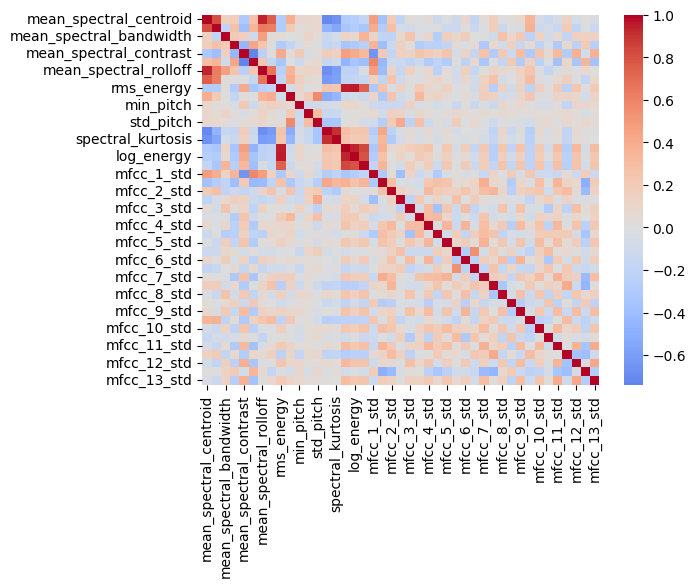

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = X.corr()
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.show()

In [26]:
import numpy as np

# Calcula la matriz de correlación absoluta
corr_matrix = X.corr().abs()

# Mantén solo la parte superior de la matriz (para evitar duplicados)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Encuentra las columnas con correlación alta (> 0.9)
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

print("Variables altamente correlacionadas (a eliminar):", to_drop)
# Crea un nuevo dataset sin las variables redundantes
X_reduced = X.drop(columns=to_drop)

Variables altamente correlacionadas (a eliminar): ['mean_spectral_rolloff', 'spectral_kurtosis', 'energy_entropy', 'log_energy']


Original: 43 variables
Reducido: 39 variables


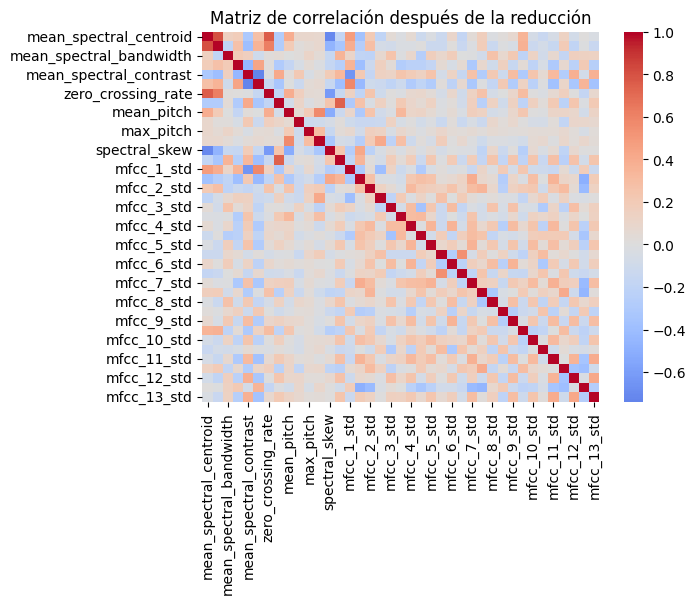

In [27]:
print(f"Original: {X.shape[1]} variables")
print(f"Reducido: {X_reduced.shape[1]} variables")

sns.heatmap(X_reduced.corr(), cmap='coolwarm', center=0)
plt.title("Matriz de correlación después de la reducción")
plt.show()

Top 20 variables más importantes (% de contribución):

mfcc_5_mean: 8.71%
mfcc_10_mean: 6.13%
mfcc_7_mean: 5.54%
std_spectral_centroid: 5.08%
mfcc_8_mean: 4.24%
mfcc_12_mean: 3.91%
mfcc_13_mean: 3.90%
mean_spectral_centroid: 3.90%
mean_spectral_contrast: 3.36%
mfcc_3_std: 3.29%
mean_spectral_flatness: 3.18%
mfcc_7_std: 3.09%
mfcc_6_mean: 2.72%
mfcc_11_mean: 2.52%
mfcc_2_std: 2.51%
mfcc_2_mean: 2.48%
std_spectral_bandwidth: 2.35%
mfcc_1_std: 2.15%
mfcc_9_mean: 2.09%
mfcc_4_mean: 2.04%


C:\Users\jlpar\AppData\Local\Temp\ipykernel_16376\2536376004.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_20.values, y=top_20.index, palette="viridis")


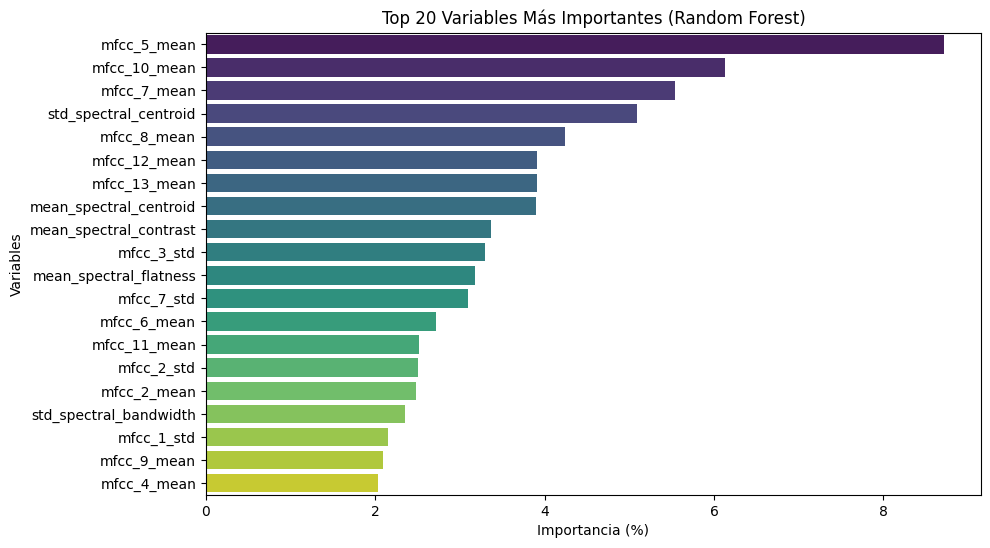

In [28]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

rf = RandomForestClassifier(random_state=42, n_jobs=-1)
rf.fit(X_reduced, y)  # entrenamiento exploratorio

importances = pd.Series(rf.feature_importances_, index=X_reduced.columns)
importances_percent = (importances / importances.sum()) * 100

top_20 = importances_percent.sort_values(ascending=False).head(20)

print("Top 20 variables más importantes (% de contribución):\n")
for feature, importance in top_20.items():
    print(f"{feature}: {importance:.2f}%")

plt.figure(figsize=(10, 6))
sns.barplot(x=top_20.values, y=top_20.index, palette="viridis")
plt.title("Top 20 Variables Más Importantes (Random Forest)")
plt.xlabel("Importancia (%)")
plt.ylabel("Variables")
plt.show()



In [29]:
# Seleccionamos las 20 variables con mayor importancia
top_20_features = importances.head(20).index

print("Top 20 variables más importantes:")
for i, feature in enumerate(top_20_features, 1):
    print(f"{i}. {feature}")

# Creamos un nuevo DataFrame con solo esas columnas
X_top20 = X_reduced[top_20_features]


Top 20 variables más importantes:
1. mean_spectral_centroid
2. std_spectral_centroid
3. mean_spectral_bandwidth
4. std_spectral_bandwidth
5. mean_spectral_contrast
6. mean_spectral_flatness
7. zero_crossing_rate
8. rms_energy
9. mean_pitch
10. min_pitch
11. max_pitch
12. std_pitch
13. spectral_skew
14. mfcc_1_mean
15. mfcc_1_std
16. mfcc_2_mean
17. mfcc_2_std
18. mfcc_3_mean
19. mfcc_3_std
20. mfcc_4_mean


In [30]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_top20, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded
)


In [32]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, max_depth=10,min_samples_leaf=2,random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)


,n_estimators,200
,criterion,'gini'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [33]:
from sklearn.metrics import classification_report

y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=le.classes_))


               precision    recall  f1-score   support

 female_adult       0.71      0.55      0.62       150
female_senior       0.77      0.94      0.85       150
 female_young       0.64      0.60      0.62       149
   male_adult       0.75      0.85      0.80       150
  male_senior       0.88      0.93      0.90       150
   male_young       0.90      0.79      0.84       150

     accuracy                           0.78       899
    macro avg       0.77      0.78      0.77       899
 weighted avg       0.77      0.78      0.77       899



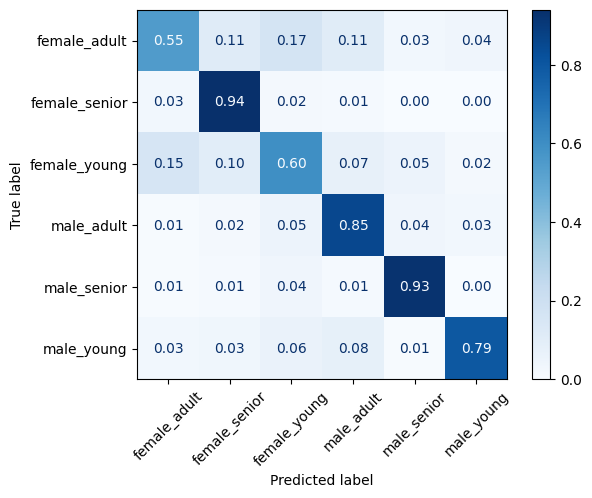

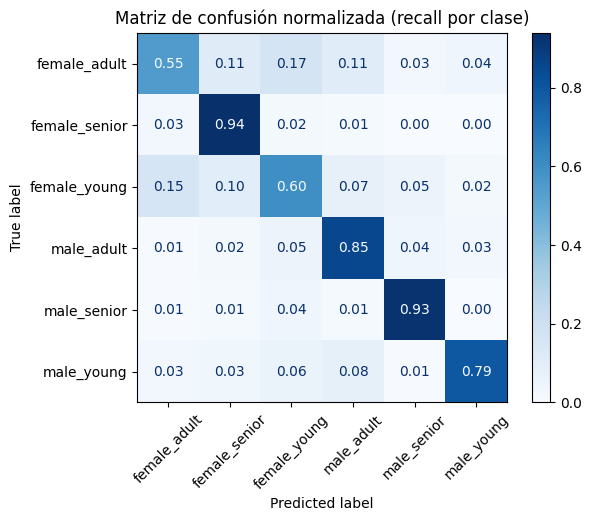

In [34]:
#Matriz de confusion
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# normalize='true' convierte los conteos en proporciones sobre las filas (Recall)
cm = confusion_matrix(y_test, y_pred, labels=rf.classes_, normalize='true')

# Usamos le.classes_ para obtener los nombres reales (female_adult, etc.)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)

# values_format='.2f' asegura el formato 0.80
disp.plot(xticks_rotation=45, cmap='Blues', values_format='.2f')

# filepath: c:\Users\jlpar\Escritorio\preprocesamiento audios\rfaudios.ipynb
#Matriz de confusion
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# normalize='true' convierte los conteos en proporciones sobre las filas (Recall)
cm = confusion_matrix(y_test, y_pred, labels=rf.classes_, normalize='true')

# Usamos le.classes_ para obtener los nombres reales (female_adult, etc.)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)

# values_format='.2f' asegura el formato 0.80
disp.plot(xticks_rotation=45, cmap='Blues', values_format='.2f')

plt.title("Matriz de confusión normalizada (recall por clase)")
plt.show()

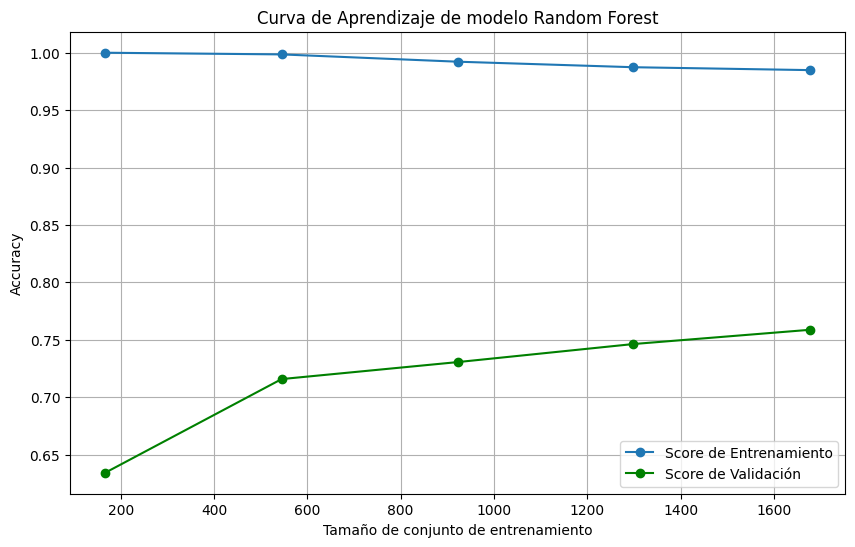

In [37]:
from sklearn.model_selection import learning_curve
import numpy as np

# Generamos la curva calculando el score con diferentes tamaños de dataset (10% al 100%)
train_sizes, train_scores, test_scores = learning_curve(
    rf, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5)
)

# Calculamos el promedio de los resultados para suavizar la gráfica
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

# Graficamos
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Score de Entrenamiento', marker='o')
plt.plot(train_sizes, test_mean, label='Score de Validación', marker='o', color='green')

plt.title('Curva de Aprendizaje de modelo Random Forest')
plt.xlabel('Tamaño de conjunto de entrenamiento')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [38]:
from sklearn.metrics import classification_report

# 1. Generamos predicciones usando los datos de ENTRENAMIENTO
y_train_pred = rf.predict(X_train)

# 2. Imprimimos el reporte
print("--- MÉTRICAS EN ENTRENAMIENTO (TRAIN) ---")
print(classification_report(y_train, y_train_pred, target_names=le.classes_))

--- MÉTRICAS EN ENTRENAMIENTO (TRAIN) ---
               precision    recall  f1-score   support

 female_adult       1.00      0.97      0.99       350
female_senior       0.95      1.00      0.97       348
 female_young       0.97      0.98      0.97       349
   male_adult       0.98      0.99      0.99       350
  male_senior       0.99      0.97      0.98       350
   male_young       0.99      0.96      0.98       350

     accuracy                           0.98      2097
    macro avg       0.98      0.98      0.98      2097
 weighted avg       0.98      0.98      0.98      2097



In [36]:
from sklearn.metrics import roc_auc_score

# predicciones de probabilidad (cada columna es una clase)
y_proba = rf.predict_proba(X_test)

# calcula el AUC ROC para el escenario multiclase
auc = roc_auc_score(y_test, y_proba, multi_class='ovr')
print(f"AUC ROC (One-vs-Rest): {auc:.3f}")


AUC ROC (One-vs-Rest): 0.952


In [40]:
from sklearn.model_selection import cross_val_score

# Calcula el accuracy 5 veces distintas mezclando los datos
scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')

print(f"Scores individuales: {scores}")
print(f"Accuracy Promedio Real (Validación Cruzada): {scores.mean():.2f}")# filepath: c:\Users\jlpar\Escritorio\preprocesamiento audios\rfaudios.ipynb
from sklearn.model_selection import cross_val_score

# Calcula el accuracy 5 veces distintas mezclando los datos
scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')

print(f"Scores individuales: {scores}")
print(f"Accuracy Promedio Real (Validación Cruzada): {scores.mean():.2f}")

Scores individuales: [0.74047619 0.78333333 0.76372315 0.73747017 0.75656325]
Accuracy Promedio Real (Validación Cruzada): 0.76
Scores individuales: [0.74047619 0.78333333 0.76372315 0.73747017 0.75656325]
Accuracy Promedio Real (Validación Cruzada): 0.76


In [41]:
from sklearn.model_selection import GridSearchCV

# 1. Definimos el modelo vacío (sin parámetros fijos)
rf_base = RandomForestClassifier(random_state=42, n_jobs=-1)

# 2. Definimos la "rejilla" de opciones que queremos probar
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, 15, None],  # None permite que crezca infinito (cuidado overfitting)
    'min_samples_leaf': [1, 2, 4]    # Más alto = menos overfitting
}

# 3. Configuramos la búsqueda con Validación Cruzada (cv=5)
grid_search = GridSearchCV(
    estimator=rf_base,
    param_grid=param_grid,
    cv=5,               # Aquí es donde se define la validación cruzada
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

# 4. Entrenamos (Esto tardará un poco porque prueba muchas combinaciones)
grid_search.fit(X_train, y_train)

# 5. Vemos el resultado
print(f"Mejores parámetros encontrados: {grid_search.best_params_}")
print(f"Mejor Accuracy (promedio CV): {grid_search.best_score_:.2f}")

# 6. Guardamos el mejor modelo en nuestra variable 'rf' para seguir usándolo
rf = grid_search.best_estimator_# filepath: c:\Users\jlpar\Escritorio\preprocesamiento audios\rfaudios.ipynb
from sklearn.model_selection import GridSearchCV

# 1. Definimos el modelo vacío (sin parámetros fijos)
rf_base = RandomForestClassifier(random_state=42, n_jobs=-1)

# 2. Definimos la "rejilla" de opciones que queremos probar
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, 15, None],  # None permite que crezca infinito (cuidado overfitting)
    'min_samples_leaf': [1, 2, 4]    # Más alto = menos overfitting
}

# 3. Configuramos la búsqueda con Validación Cruzada (cv=5)
grid_search = GridSearchCV(
    estimator=rf_base,
    param_grid=param_grid,
    cv=5,               # Aquí es donde se define la validación cruzada
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

# 4. Entrenamos (Esto tardará un poco porque prueba muchas combinaciones)
grid_search.fit(X_train, y_train)

# 5. Vemos el resultado
print(f"Mejores parámetros encontrados: {grid_search.best_params_}")
print(f"Mejor Accuracy (promedio CV): {grid_search.best_score_:.2f}")

# 6. Guardamos el mejor modelo en nuestra variable 'rf' para seguir usándolo
rf = grid_search.best_estimator_

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Mejores parámetros encontrados: {'max_depth': 15, 'min_samples_leaf': 1, 'n_estimators': 200}
Mejor Accuracy (promedio CV): 0.77
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Mejores parámetros encontrados: {'max_depth': 15, 'min_samples_leaf': 1, 'n_estimators': 200}
Mejor Accuracy (promedio CV): 0.77
